In [44]:
# source_exopandas: 
# source_randomtools
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

import exopandas.exodataframe as edf
%matplotlib notebook

In [3]:
path_tgtlst = "/Users/olivier/Google_Drive/Sheets/target_lists/ARIEL/Target List/ariel_target_list_15032019.csv"
df = pd.read_csv(path_tgtlst)
df.count()

Star Name                               2086
Star Mass [Ms]                          2086
Star Mass Error Lower [Ms]              2036
Star Mass Error Upper [Ms]              2050
Star Temperature [K]                    2086
Star Temperature Error Lower [K]        2009
Star Temperature Error Upper [K]        2024
Star Radius [Rs]                        2086
Star Radius Error Lower [Rs]            1895
Star Radius Error Upper [Rs]            1909
Star Distance [pc]                      2086
Star Distance Error Lower [pc]          1989
Star Distance Error Upper [pc]          1989
Star Gaia Parallax [mas]                1980
Star Gaia Parallax Error Lower [mas]    1980
Star Gaia Parallax Error Upper [mas]    1980
Star log(g)                             2086
Star log(g) Error Lower                 1933
Star log(g) Error Upper                 1933
Star K Mag                              2086
Star V Mag                              1999
Star Gaia Mag                           1951
Star Metal

In [4]:
# See the Stellar mass precision reported in the ARIEL target list catalog
df["Star Mass Precision (2sig)"] = (df["Star Mass Error Upper [Ms]"] - df["Star Mass Error Lower [Ms]"]) / df["Star Mass [Ms]"]
df[df["Known (Y=1,N=0)"] == 1]["Star Mass Precision (2sig)"].describe()

count    344.000000
mean       0.280583
std        0.328687
min        0.000000
25%        0.078740
50%        0.118846
75%        0.391350
max        1.802198
Name: Star Mass Precision (2sig), dtype: float64

<IPython.core.display.Javascript object>


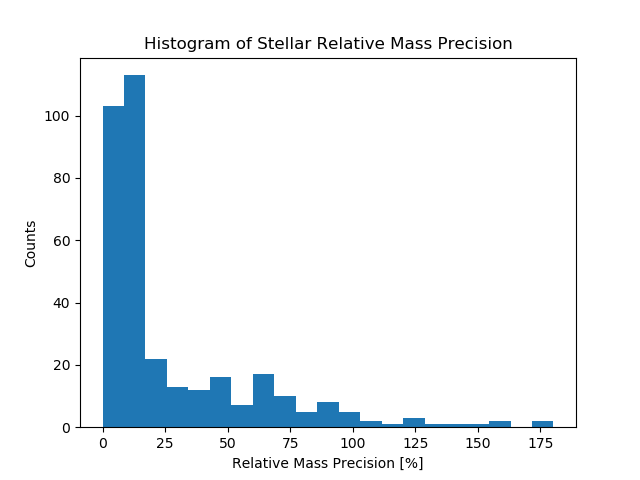

In [53]:
# Plot of EU and EA mass precision histograms
fig, ax = pl.subplots()
counts, bins, patches = ax.hist(df[df["Known (Y=1,N=0)"] == 1]["Star Mass Precision (2sig)"].dropna() * 100, bins='auto')
ax.set_title("Histogram of Stellar Relative Mass Precision")
ax.set_xlabel("Relative Mass Precision [%]")
ax.set_ylabel("Counts")
pl.savefig("hist_stmass_precision.pdf")
pl.show()

In [5]:
## Load Exoplanet.eu and Exoplanet archive
df_EU = edf.ExoDataFrame()
df_EU.load("exoplaneteu")
df_EA = edf.ExoDataFrame()
df_EA.load("exoplanetarchive")

/Users/olivier/Softwares/exopandas/exopandas/exodataframe.py:78: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if column in self.column_info["column"].unique():


In [6]:
# Try to cross-correlate the two lists
# First need to put a space between the name of the star and the planet extension
df["pl_name_exopcat"] = None
for idx, row in df.iterrows():
    df.loc[(idx, "pl_name_exopcat")] = row["Planet Name"][:-1] + " " + row["Planet Name"][-1]

In [7]:
# Look for the planet in EU and compute the mass precision.
df["pl_mass_prec_EU"] = np.nan
df["found_in_EU"] = False
df["found_in_EA"] = False
df["idx_EU"] = None
df["idx_EA"] = None
nb_rows = len(df.index)
for idx, row in df.iterrows():
    print("{}/{}".format(idx, nb_rows))
    if row['Known (Y=1,N=0)']:
        for namecat, df_exopcat in zip(["EU", "EA"], [df_EU, df_EA]):
            if (df_exopcat["pl_name"] == row["pl_name_exopcat"]).any():
                print("Found in {}!".format(namecat))
                idxcat0 = df_exopcat[(df_exopcat["pl_name"] == row["pl_name_exopcat"])]["pl_massj"].index[0]
                df.loc[(idx, "idx_{}".format(namecat))] = idxcat0
                df.loc[(idx, "pl_mass_prec_{}".format(namecat))] = (np.abs(df_exopcat.loc[idxcat0]["pl_massj_err_inf"]) + df_exopcat.loc[idxcat0]["pl_massj_err_sup"]) / df_exopcat.loc[idxcat0]["pl_massj"]
                df.loc[(idx, "found_in_{}".format(namecat))] = True

0/2086
1/2086
Found in EU!
Found in EA!
2/2086
Found in EU!
Found in EA!
3/2086
Found in EU!
Found in EA!
4/2086
Found in EU!
Found in EA!
5/2086
Found in EU!
Found in EA!
6/2086
Found in EU!
Found in EA!
7/2086
Found in EU!
Found in EA!
8/2086
9/2086
10/2086
11/2086
12/2086
13/2086
14/2086
15/2086
16/2086
Found in EU!
Found in EA!
17/2086
Found in EU!
Found in EA!
18/2086
Found in EU!
Found in EA!
19/2086
Found in EU!
Found in EA!
20/2086
Found in EU!
Found in EA!
21/2086
Found in EU!
Found in EA!
22/2086
Found in EU!
Found in EA!
23/2086
Found in EU!
Found in EA!
24/2086
Found in EU!
Found in EA!
25/2086
Found in EU!
Found in EA!
26/2086
Found in EU!
Found in EA!
27/2086
Found in EU!
Found in EA!
28/2086
Found in EU!
Found in EA!
29/2086
Found in EU!
Found in EA!
30/2086
Found in EU!
Found in EA!
31/2086
Found in EU!
Found in EA!
32/2086
Found in EU!
Found in EA!
33/2086
Found in EU!
Found in EA!
34/2086
Found in EU!
Found in EA!
35/2086
Found in EU!
Found in EA!
36/2086
Found in EU!

Found in EU!
Found in EA!
280/2086
Found in EU!
Found in EA!
281/2086
Found in EU!
Found in EA!
282/2086
Found in EU!
Found in EA!
283/2086
Found in EU!
Found in EA!
284/2086
Found in EU!
Found in EA!
285/2086
Found in EU!
Found in EA!
286/2086
Found in EU!
Found in EA!
287/2086
Found in EU!
Found in EA!
288/2086
Found in EU!
Found in EA!
289/2086
Found in EU!
Found in EA!
290/2086
Found in EU!
Found in EA!
291/2086
Found in EU!
Found in EA!
292/2086
Found in EU!
Found in EA!
293/2086
Found in EU!
Found in EA!
294/2086
Found in EU!
Found in EA!
295/2086
Found in EU!
Found in EA!
296/2086
Found in EU!
Found in EA!
297/2086
Found in EU!
Found in EA!
298/2086
Found in EU!
Found in EA!
299/2086
Found in EU!
Found in EA!
300/2086
Found in EU!
Found in EA!
301/2086
Found in EU!
Found in EA!
302/2086
Found in EU!
Found in EA!
303/2086
Found in EU!
Found in EA!
304/2086
Found in EU!
Found in EA!
305/2086
Found in EU!
Found in EA!
306/2086
Found in EU!
Found in EA!
307/2086
Found in EU!
Found i

1082/2086
1083/2086
1084/2086
1085/2086
1086/2086
1087/2086
1088/2086
1089/2086
1090/2086
1091/2086
1092/2086
1093/2086
1094/2086
1095/2086
1096/2086
1097/2086
1098/2086
1099/2086
1100/2086
1101/2086
1102/2086
1103/2086
1104/2086
1105/2086
1106/2086
1107/2086
1108/2086
1109/2086
1110/2086
1111/2086
1112/2086
1113/2086
1114/2086
1115/2086
1116/2086
1117/2086
1118/2086
1119/2086
1120/2086
1121/2086
1122/2086
1123/2086
1124/2086
1125/2086
1126/2086
1127/2086
1128/2086
1129/2086
1130/2086
1131/2086
1132/2086
1133/2086
1134/2086
1135/2086
1136/2086
1137/2086
1138/2086
1139/2086
1140/2086
1141/2086
1142/2086
1143/2086
1144/2086
1145/2086
1146/2086
1147/2086
1148/2086
1149/2086
1150/2086
1151/2086
1152/2086
1153/2086
1154/2086
1155/2086
1156/2086
1157/2086
1158/2086
1159/2086
1160/2086
1161/2086
1162/2086
1163/2086
1164/2086
1165/2086
1166/2086
1167/2086
1168/2086
1169/2086
1170/2086
1171/2086
1172/2086
1173/2086
1174/2086
1175/2086
1176/2086
1177/2086
1178/2086
1179/2086
1180/2086
1181/2086


In [8]:
print("Known planet : {}, {:.0f} %".format(df["Known (Y=1,N=0)"].sum(), df["Known (Y=1,N=0)"].sum() / nb_rows * 100))
# Known planet : 361, 17 %

Known planet : 361, 17 %


In [13]:
df_known_found = {}
for namecat, df_exopcat in zip(["EU", "EA"], [df_EU, df_EA]):
    df_known_found[namecat] = df[df["found_in_{}".format(namecat)]]
    print("Known planet found in {}: {}, {:.0f} %".format(namecat, df["found_in_{}".format(namecat)].sum(), df["found_in_{}".format(namecat)].sum() / df["Known (Y=1,N=0)"].sum() * 100))

Known planet found in EU: 308, 85 %
Known planet found in EA: 326, 90 %


In [15]:
df_known_notfound = {}
for namecat, df_exopcat in zip(["EU", "EA"], [df_EU, df_EA]):
    df_known_notfound[namecat] = df[np.logical_not(df["found_in_{}".format(namecat)]) & df["Known (Y=1,N=0)"]]
    print("List of known planet not found in {}: \n{}".format(namecat, df_known_notfound[namecat][["pl_name_exopcat", ]]))

List of known planet not found in EU: 
     pl_name_exopcat
0            55Cnc e
8    EPIC211945201 b
9    EPIC246851721 b
10          GJ1132 b
11          GJ1214 b
12          GJ3470 b
13           GJ436 b
14          GJ9827 b
15          GJ9827 d
108       HD106315 c
109       HD149026 b
110        HD17156 b
111       HD189733 b
112       HD209458 b
113       HD219134 b
114         HD3167 b
115         HD3167 c
116        HD80606 b
117        HD89345 b
118        HD97658 b
119       HIP41378 e
120       HIP41378 f
123         K2-113 b
124         K2-115 b
125         K2-121 b
126         K2-129 b
127         K2-132 b
132         K2-155 c
135         K2-198 b
136         K2-199 c
137         K2-232 b
138         K2-233 d
143          K2-25 b
146         K2-266 b
147         K2-266 d
148         K2-280 b
152           K2-3 b
165        KELT-14 b
169        KELT-2A b
171        KELT-4A b
175         KOI-12 b
176         KOI-94 d
182      Kepler-16 b
197        LHS1140 b
198        LHS11

In [14]:
df_known_Mprec = {}
for namecat, df_exopcat in zip(["EU", "EA"], [df_EU, df_EA]):
    df_known_Mprec[namecat] = df[df["found_in_{}".format(namecat)] & np.logical_not(np.isnan(df["pl_mass_prec_{}".format(namecat)]))]
    print("Known planet with mass precision from {}: {}, {:.0f} %".format(namecat, df["pl_mass_prec_{}".format(namecat)].count(), df["pl_mass_prec_{}".format(namecat)].count() / df["Known (Y=1,N=0)"].sum() * 100))

Known planet with mass precision from EU: 292, 81 %
Known planet with mass precision from EA: 286, 79 %


In [17]:
df_known_noMprec = {}
for namecat, df_exopcat in zip(["EU", "EA"], [df_EU, df_EA]):
    df_known_noMprec[namecat] = df[df["found_in_{}".format(namecat)] & np.isnan(df["pl_mass_prec_{}".format(namecat)])]
    print("List of know planets found in {} without mass precision:\n{}".format(namecat, df_known_noMprec[namecat][["pl_name_exopcat", "idx_{}".format(namecat)]]))
    print("Mass info for know planets found in {} without mass precision:\n{}".format(namecat, df_exopcat.loc[df_known_noMprec[namecat]["idx_{}".format(namecat)].values, ["pl_massj", "pl_massj_err_inf", "pl_massj_err_sup"]]))


List of know planets found in EU without mass precision:
    pl_name_exopcat idx_EU
31       HAT-P-25 b    316
121        K2-100 b   1096
128        K2-136 c   1108
158         K2-52 b   1182
181   Kepler-1514 b   1940
186    Kepler-444 b   2827
187    Kepler-444 c   2828
188    Kepler-444 d   2829
189    Kepler-444 e   2830
195    Kepler-854 b   3388
212    TRAPPIST-1 h   3791
309       WASP-54 b   3947
311       WASP-56 b   3949
312       WASP-57 b   3950
315       WASP-60 b   3954
319       WASP-64 b   3958
Mass info for know planets found in EU without mass precision:
      pl_massj  pl_massj_err_inf  pl_massj_err_sup
316     0.5670               NaN               NaN
1096       NaN               NaN               NaN
1108       NaN               NaN               NaN
1182    0.4046               NaN               NaN
1940       NaN               NaN               NaN
2827       NaN               NaN               NaN
2828       NaN               NaN               NaN
2829       Na

In [18]:
df_known_foundsomewhere = df[np.logical_or(df["found_in_EU"], df["found_in_EA"])]
print("Known planet found in EU or EA: {}, {:.0f} %".format(np.logical_or(df["found_in_EU"], df["found_in_EA"]).sum(), np.logical_or(df["found_in_EU"], df["found_in_EA"]).sum() / df["Known (Y=1,N=0)"].sum() * 100))

Known planet found in EU or EA: 329, 91 %


In [19]:
df_known_foundinboth = df[np.logical_and(df["found_in_EU"], df["found_in_EA"])].copy()
print("Known planet found in EU and EA: {}, {:.0f} %".format(np.logical_and(df["found_in_EU"], df["found_in_EA"]).sum(), np.logical_and(df["found_in_EU"], df["found_in_EA"]).sum() / df["Known (Y=1,N=0)"].sum() * 100))

Known planet found in EU and EA: 305, 84 %


In [20]:
df_known_notfoundanywhere = df[np.logical_not(df["found_in_EU"]) & np.logical_not(df["found_in_EA"]) & df["Known (Y=1,N=0)"]]
print("List of known planet not found in neither EU nor EA ({} planets): \n{}".format(len(df_known_notfoundanywhere.index), df_known_notfoundanywhere[["pl_name_exopcat", ]]))

List of known planet not found in neither EU nor EA (32 planets): 
     pl_name_exopcat
0            55Cnc e
8    EPIC211945201 b
9    EPIC246851721 b
10          GJ1132 b
11          GJ1214 b
12          GJ3470 b
13           GJ436 b
14          GJ9827 b
15          GJ9827 d
108       HD106315 c
109       HD149026 b
110        HD17156 b
111       HD189733 b
112       HD209458 b
113       HD219134 b
114         HD3167 b
115         HD3167 c
116        HD80606 b
117        HD89345 b
118        HD97658 b
119       HIP41378 e
120       HIP41378 f
169        KELT-2A b
171        KELT-4A b
197        LHS1140 b
198        LHS1140 c
264      WASP-160B b
326       WASP-70A b
333       WASP-77A b
342       WASP-85A b
348       WASP-94A b
354        Wolf503 b


<IPython.core.display.Javascript object>


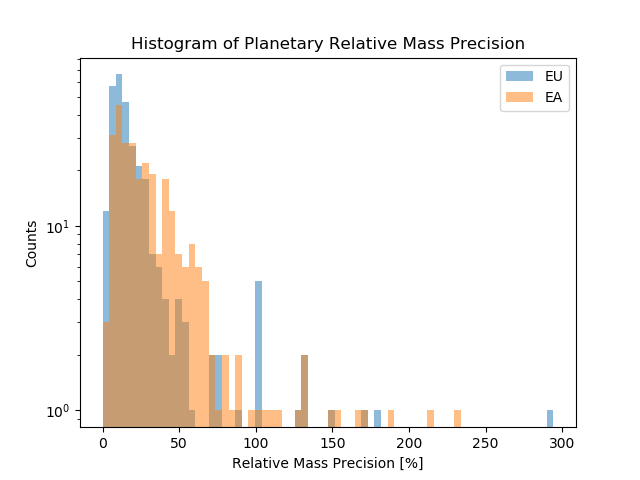

In [52]:
# Plot of EU and EA mass precision histograms
fig, ax = pl.subplots()
counts, bins, patches = ax.hist(df_known_found["EU"]["pl_mass_prec_EU"].dropna() * 100, bins='auto', log=True, alpha=0.5, label="EU")
ax.hist(df_known_found["EA"]["pl_mass_prec_EA"].dropna() * 100, bins=bins, log=True, alpha=0.5, label="EA")
ax.set_title("Histogram of Planetary Relative Mass Precision")
ax.set_xlabel("Relative Mass Precision [%]")
ax.set_ylabel("Counts")
pl.legend()
pl.savefig("hist_plmass_precision.pdf")
pl.show()

In [22]:
# Compute Mass estimate difference for planet found in both catalogs
df_known_foundinboth.loc[:, "mass_difference"] = np.nan
for idx, row in df_known_foundinboth.iterrows():
    mass_dif = df_EU.loc[row["idx_EU"], "pl_massj"] - df_EA.loc[row["idx_EA"], "pl_massj"]
    if mass_dif > 0:
        sigma_sum = df_EU.loc[row["idx_EU"], "pl_massj_err_inf"] + df_EA.loc[row["idx_EA"], "pl_massj_err_sup"]
    else:
        sigma_sum = np.abs(df_EA.loc[row["idx_EA"], "pl_massj_err_inf"]) + np.float64(df_EU.loc[row["idx_EU"], "pl_massj_err_sup"])
    if not(np.isnan(sigma_sum)):
        df_known_foundinboth.loc[idx, "mass_difference"] = np.float64(np.abs(mass_dif) / sigma_sum)
    else:
        df_known_foundinboth.loc[idx, "mass_difference"] = np.nan

<IPython.core.display.Javascript object>


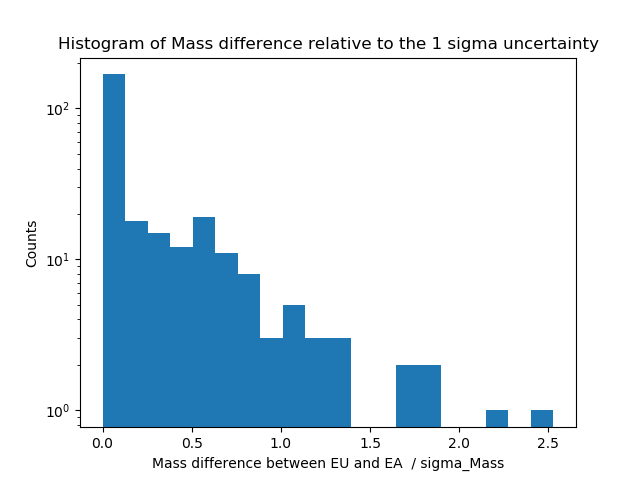

In [51]:
# Plot of EU and EA mass precision histograms
fig, ax = pl.subplots()
ax.hist(df_known_foundinboth["mass_difference"].dropna(), bins='auto', log=True)
ax.set_title("Histogram of Mass difference relative to the 1 sigma uncertainty")
ax.set_xlabel("Mass difference between EU and EA  / sigma_Mass")
ax.set_ylabel("Counts")
pl.savefig("hist_plmass_difference.pdf")
pl.show()

<IPython.core.display.Javascript object>


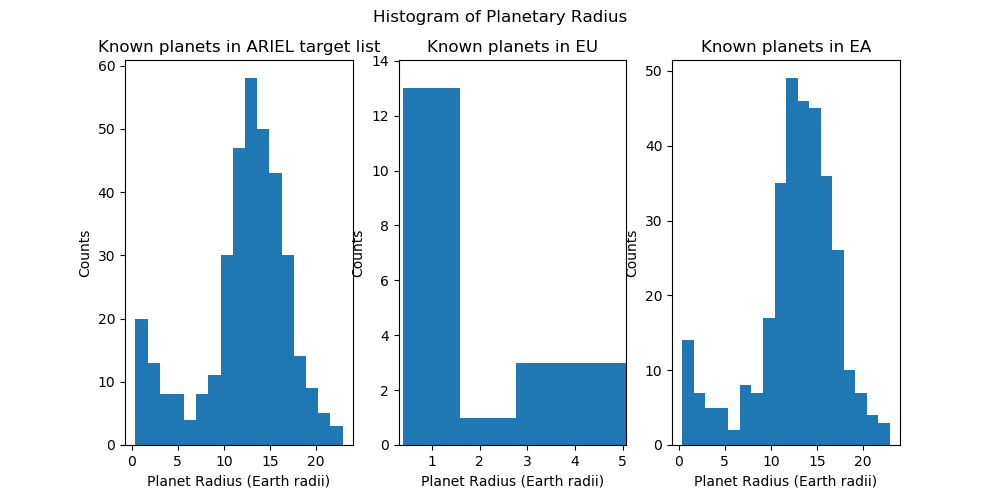

In [47]:
fig, ax = pl.subplots(ncols=3, figsize=(10, 5))
fig.suptitle("Histogram of Planetary Radius")
ax[0].hist(df[df["Known (Y=1,N=0)"] == 1]["Planet Radius [Re]"], bins="auto")
ax[0].set_title("Known planets in ARIEL target list")
ax[1].hist(df_known_found["EU"]["Planet Radius [Re]"], bins="auto")
ax[1].set_title("Known planets in EU")
ax[2].hist(df_known_found["EA"]["Planet Radius [Re]"], bins="auto")
ax[2].set_title("Known planets in EA")
for ii in range(3):
    ax[ii].set_xlabel("Planet Radius (Earth radii)")
    ax[ii].set_ylabel("Counts")

<IPython.core.display.Javascript object>


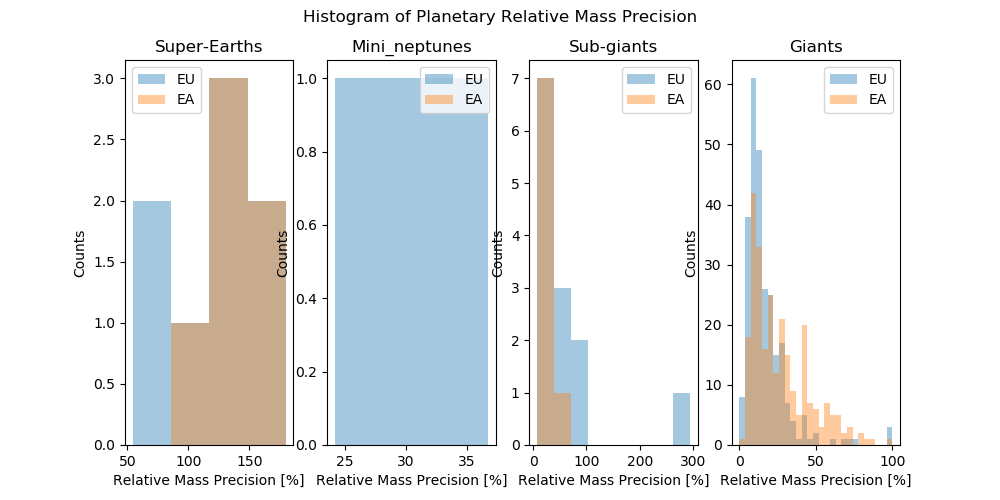

In [50]:
# Plot Mass precision histogram for class of planets
fig, ax = pl.subplots(ncols=4, figsize=(10, 5))
fig.suptitle("Histogram of Planetary Relative Mass Precision")
radj = 11.2
for ii, radius_lims, title in zip(range(4), [(0., 2.), (2., 4.), (4., 8.), (8., 22)  ], ["Super-Earths", "Mini_neptunes", "Sub-giants", "Giants"]):
    df_EU_planetclass = df_known_found["EU"][(df_known_found["EU"]["Planet Radius [Re]"] >= radius_lims[0]) & (df_known_found["EU"]["Planet Radius [Re]"] < radius_lims[1])]
    df_EA_planetclass = df_known_found["EA"][(df_known_found["EA"]["Planet Radius [Re]"] >= radius_lims[0]) & (df_known_found["EA"]["Planet Radius [Re]"] < radius_lims[1])]
    counts, bins, patches = ax[ii].hist(df_EU_planetclass["pl_mass_prec_EU"].dropna() * 100, bins='auto', alpha=0.4, label="EU")
    ax[ii].hist(df_EA_planetclass["pl_mass_prec_EA"].dropna() * 100, bins=bins, alpha=0.4, label="EA")
    ax[ii].set_title(title)
    ax[ii].set_xlabel("Relative Mass Precision [%]")
    ax[ii].set_ylabel("Counts")
    ax[ii].legend()
pl.savefig("hist_plmass_precision_perclass.pdf")
pl.show()